In [1]:
from PIL import Image, ImageEnhance
import PIL.Image
from editor.utils import random, get_colour_lut, apply_pixel_shader
from editor.ploting import display_images
from editor.operations import add_noise, add_random_colour_spill
from pathlib import Path


PIL.Image.MAX_IMAGE_PIXELS = None


DATA = Path('/mnt/wsl/PHYSICALDRIVE1/data/unsplash')
EDIT_COUNT = 10
TARGET_SIZE = 480, 480
originals = sorted(DATA.glob('*.jpg'))
originals_iter = iter(originals)


def random_edit(img: Image) -> Image:
    img = add_noise(img, random(0, 0.2))
    img = ImageEnhance.Contrast(img).enhance(random(0.5, 2))
    img = add_random_colour_spill(img, 1.3)
    img = img.convert("HSV")
    saturation_lut = get_colour_lut(variance=0.3, count=5, type='linear')
    brightness_lut = get_colour_lut(variance=0.3, count=5, type='cubic')
    img = apply_pixel_shader(img, lambda h, s, v: (h, saturation_lut[s], brightness_lut[v]))
    img = img.convert("RGB")
    return img


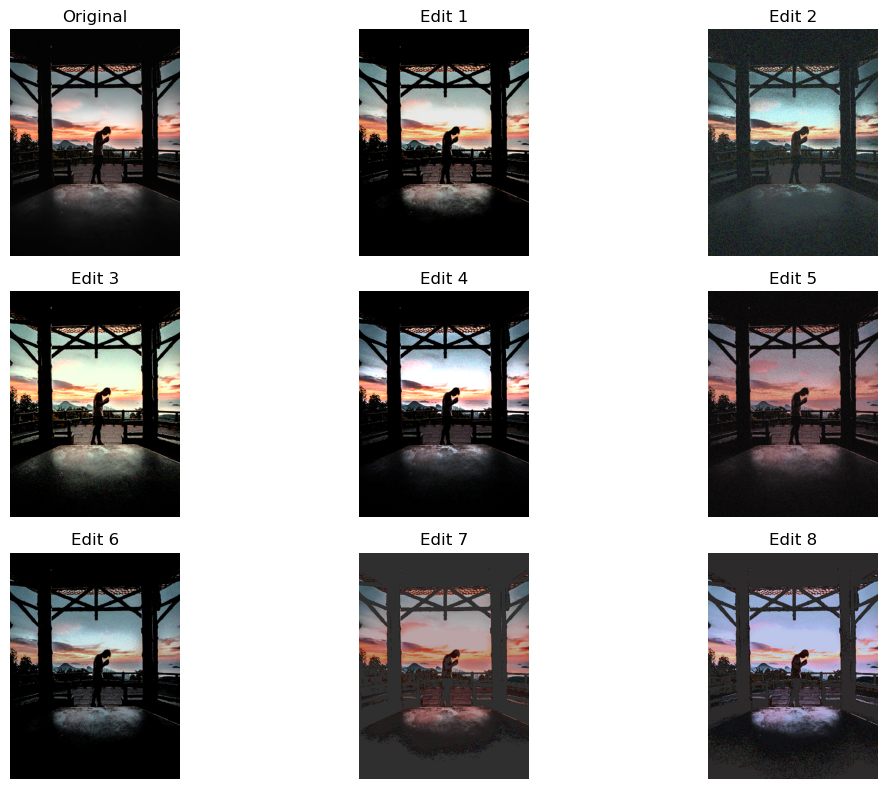

In [2]:
example = next(originals_iter)
img = Image.open(example)
img.thumbnail(TARGET_SIZE, Image.Resampling.LANCZOS)

edits = [
    random_edit(img.copy())
    for _ in range(8)
]

images = [img] + edits
titles = ['Original'] + [f'Edit {i}' for i in range(1, len(images))]

display_images(images, titles)

In [3]:
import concurrent.futures
from tqdm import tqdm


def create_random_edits(file: Path):
    try:
        edits_folder = DATA / 'edited' / file.stem
        edits_folder.mkdir(parents=True, exist_ok=True)

        img = Image.open(file)
        img.thumbnail(TARGET_SIZE, Image.Resampling.LANCZOS)
        img.save(edits_folder / 'original.jpg')

        for i in range(EDIT_COUNT):
            clone = img.copy()
            clone = random_edit(clone)
            clone.save(edits_folder / f'{i}.jpg')
    except Exception as e:
        print(e, file)


with tqdm(total=len(originals)) as progress_bar:
    with concurrent.futures.ProcessPoolExecutor(32) as executor:
        futures = [executor.submit(create_random_edits, file) for file in originals]
        for future in concurrent.futures.as_completed(futures):
            future.result()
            progress_bar.update(1)

  7%|▋         | 1849/24997 [01:06<15:04, 25.60it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/3t78mz5oVx8.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/3t78mz5oVx8.jpg


 18%|█▊        | 4472/24997 [02:37<12:59, 26.35it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/Ah3ir6fxfqg.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/Ah3ir6fxfqg.jpg


 20%|█▉        | 4916/24997 [02:55<14:10, 23.61it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/Bvoc14Xyt00.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/Bvoc14Xyt00.jpg


 24%|██▍       | 5992/24997 [03:33<14:49, 21.36it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/EdLtou2WSxU.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/EdLtou2WSxU.jpg


 27%|██▋       | 6627/24997 [03:56<12:11, 25.11it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/GFttLy00kEE.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/GFttLy00kEE.jpg


 35%|███▌      | 8772/24997 [05:12<08:31, 31.72it/s]

cannot write mode P as JPEG /mnt/wsl/PHYSICALDRIVE1/data/unsplash/LmLj4iign6Q.jpg


 37%|███▋      | 9133/24997 [05:24<09:23, 28.14it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/MmWy_lqDQNE.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/MmWy_lqDQNE.jpg


 38%|███▊      | 9566/24997 [05:39<09:46, 26.30it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/NvL3xrjEX3k.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/NvL3xrjEX3k.jpg


 40%|███▉      | 9893/24997 [05:50<08:55, 28.22it/s]

cannot write mode P as JPEG /mnt/wsl/PHYSICALDRIVE1/data/unsplash/Of9dTU50RlU.jpg


 41%|████▏     | 10360/24997 [06:07<08:07, 30.00it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/PnrrSnzyU8s.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/PnrrSnzyU8s.jpg


 46%|████▌     | 11449/24997 [06:45<09:03, 24.94it/s]

cannot write mode P as JPEG /mnt/wsl/PHYSICALDRIVE1/data/unsplash/SWF1n1Bzlg0.jpg


 46%|████▋     | 11592/24997 [06:50<06:30, 34.32it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/Srlss1BXN1k.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/Srlss1BXN1k.jpg


 50%|████▉     | 12377/24997 [07:17<07:15, 28.99it/s]

cannot write mode P as JPEG /mnt/wsl/PHYSICALDRIVE1/data/unsplash/UsWjYe1FdlU.jpg


 55%|█████▌    | 13769/24997 [08:06<06:16, 29.81it/s]

cannot write mode P as JPEG /mnt/wsl/PHYSICALDRIVE1/data/unsplash/YRJrO0-OP1A.jpg


 55%|█████▌    | 13868/24997 [08:09<06:08, 30.17it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/Yi-bJNtHziA.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/Yi-bJNtHziA.jpg


 59%|█████▉    | 14704/24997 [08:39<04:48, 35.62it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/_mu0vTle47w.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/_mu0vTle47w.jpg


 65%|██████▍   | 16216/24997 [09:31<05:51, 24.98it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/dkmjbTrHUEo.jpg'

 65%|██████▍   | 16223/24997 [09:31<04:32, 32.23it/s]

 /mnt/wsl/PHYSICALDRIVE1/data/unsplash/dkmjbTrHUEo.jpg


 69%|██████▉   | 17197/24997 [10:06<04:08, 31.44it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/gEbJwcbWNpc.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/gEbJwcbWNpc.jpgcannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/gEb091vDXOs.jpg'
 /mnt/wsl/PHYSICALDRIVE1/data/unsplash/gEb091vDXOs.jpg


 72%|███████▏  | 18080/24997 [10:36<03:55, 29.39it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/iXBGCA5AhZQ.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/iXBGCA5AhZQ.jpg


 77%|███████▋  | 19178/24997 [11:14<02:43, 35.50it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/lIWy4xWEtKo.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/lIWy4xWEtKo.jpg


 83%|████████▎ | 20837/24997 [12:13<02:14, 30.84it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/pduv-eZsfeI.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/pduv-eZsfeI.jpg


 91%|█████████ | 22694/24997 [13:19<01:33, 24.68it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/uIrfFEDXcLE.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/uIrfFEDXcLE.jpg


 91%|█████████▏| 22868/24997 [13:25<01:08, 30.89it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/uhyiwekQbsM.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/uhyiwekQbsM.jpg


 93%|█████████▎| 23125/24997 [13:34<00:55, 33.57it/s]

cannot identify image file '/mnt/wsl/PHYSICALDRIVE1/data/unsplash/vJkk9ELe-wk.jpg' /mnt/wsl/PHYSICALDRIVE1/data/unsplash/vJkk9ELe-wk.jpg


 96%|█████████▌| 23916/24997 [14:02<00:39, 27.64it/s]

cannot write mode P as JPEG /mnt/wsl/PHYSICALDRIVE1/data/unsplash/xIdyajpQ6qo.jpg


100%|██████████| 24997/24997 [14:39<00:00, 28.41it/s]
